In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

c:\Users\ADM\Documents\Estudos\analise-preditiva\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = "Dropout_Academic Success - Sheet1.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ankanhore545/dropout-or-academic-success",
  file_path,
)

C:\Users\ADM\AppData\Local\Temp\ipykernel_19292\2961937467.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [3]:
print("First 5 records:", df.head())

First 5 records:    Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
df['Target'].value_counts() 

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Levemente desbalanceado

Técnica para lidar com desbalanceamento: Class weights (ajustar pesos no modelo).

Métricas: não use só accuracy. Prefira precision, recall, F1-score e ROC-AUC.

In [8]:
X = df.drop(columns=['Target'])
y = df['Target']

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
y = le.fit_transform(y) # Convertendo rótulos para valores numéricos

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Padronizando os recursos

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y # Mantendo a proporção das classes
)

In [14]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

class_weight_dict = dict(zip(classes, class_weights))
print(class_weight_dict)


{np.int64(0): np.float64(1.0375256523013778), np.int64(1): np.float64(1.857742782152231), np.int64(2): np.float64(0.6676098849273722)}


In [15]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
model_rf.fit(X_train, y_train)

model_rf_2 = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight=class_weight_dict
)

model_rf_2.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [16]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)


model_lr_2 = LogisticRegression(
    max_iter=1000,
    class_weight=class_weight_dict
)

model_lr_2.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*","{np.int64(0): np.float64(1.0375256523013778), np.int64(1): np.float64(1.857742782152231), np.int64(2): np.float64(0.6676098849273722)}"
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

y_pred_lr_2 = model_lr_2.predict(X_test)
y_pred_rf_2 = model_rf_2.predict(X_test)

In [18]:
from sklearn.metrics import classification_report

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

print("Random Forest")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Logistic Regression
              precision    recall  f1-score   support

     Dropout       0.79      0.77      0.78       284
    Enrolled       0.52      0.33      0.41       159
    Graduate       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.77      0.75       885

Random Forest
              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.78       284
    Enrolled       0.56      0.35      0.43       159
    Graduate       0.79      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.75      0.77      0.75       885



In [19]:
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr_2, target_names=le.classes_))

print("Random Forest")
print(classification_report(y_test, y_pred_rf_2, target_names=le.classes_))

Logistic Regression
              precision    recall  f1-score   support

     Dropout       0.85      0.68      0.76       284
    Enrolled       0.41      0.64      0.50       159
    Graduate       0.86      0.79      0.82       442

    accuracy                           0.73       885
   macro avg       0.70      0.70      0.69       885
weighted avg       0.77      0.73      0.74       885

Random Forest
              precision    recall  f1-score   support

     Dropout       0.82      0.75      0.78       284
    Enrolled       0.57      0.36      0.44       159
    Graduate       0.78      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.75       885



In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [21]:
models = {
    "Naive Bayes": GaussianNB(),

    "SVM (Linear)": LinearSVC(
        class_weight=class_weight_dict,
        random_state=42
    ),

    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight=class_weight_dict
    ),

    "Decision Tree": DecisionTreeClassifier(
        class_weight=class_weight_dict,
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        class_weight=class_weight_dict,
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        objective="multi:softmax",
        num_class=len(classes),
        eval_metric="mlogloss",
        random_state=42
    ),

    "CatBoost": CatBoostClassifier(
        loss_function="MultiClass",
        class_weights=list(class_weight_dict.values()),
        verbose=0,
        random_state=42
    )
}


In [22]:
from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision_macro",
    "recall": "recall_macro",
    "f1": "f1_macro"
}


In [23]:
results = []

for name, model in models.items():
    scores = cross_validate(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )

    results.append({
        "Model": name,
        "Accuracy": scores["test_accuracy"].mean(),
        "Precision": scores["test_precision"].mean(),
        "Recall": scores["test_recall"].mean(),
        "F1": scores["test_f1"].mean()
    })


AttributeError: The following error was raised: 'CatBoostClassifier' object has no attribute '__sklearn_tags__'. It seems that there are no classes that implement `__sklearn_tags__` in the MRO and/or all classes in the MRO call `super().__sklearn_tags__()`. Make sure to inherit from `BaseEstimator` which implements `__sklearn_tags__` (or alternatively define `__sklearn_tags__` but we don't recommend this approach). Note that `BaseEstimator` needs to be on the right side of other Mixins in the inheritance order.

In [24]:
import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Recall", ascending=False)

results_df

# Melhores Logistic Regression	e  CatBoost

,Model,Accuracy,Precision,Recall,F1
2,Logistic Regression,0.747944,0.713696,0.713799,0.706179
5,XGBoost,0.770274,0.718588,0.691713,0.699762
4,Random Forest,0.777055,0.729714,0.682432,0.692147
1,SVM (Linear),0.757551,0.702354,0.679671,0.687285
3,Decision Tree,0.682114,0.616102,0.616738,0.615971
0,Naive Bayes,0.673624,0.592043,0.573197,0.573643


In [25]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier



In [ ]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np

def extract_importance(model, feature_names):
    """
    Retorna np.array de importâncias por feature.
    Compatível com:
    - modelos lineares (coef_)
    - árvores/ensembles (feature_importances_)
    - CatBoost (get_feature_importance)
    - GaussianNB (variância entre médias das classes)
    """

    # Pipeline → pega estimador final
    if isinstance(model, Pipeline):
        model = model.steps[-1][1]

    # ===== Gaussian Naive Bayes =====
    if isinstance(model, GaussianNB):
        # theta_: (n_classes, n_features)
        # usa variância entre médias das classes
        return np.var(model.theta_, axis=0)

    # ===== CatBoost =====
    if isinstance(model, CatBoostClassifier):
        return model.get_feature_importance()

    # ===== Árvores / ensembles =====
    if hasattr(model, "feature_importances_"):
        return np.array(model.feature_importances_)

    # ===== Modelos lineares =====
    if hasattr(model, "coef_"):
        coef = np.abs(model.coef_)
        if coef.ndim > 1:  # multiclass
            coef = coef.mean(axis=0)
        return coef

    raise ValueError(
        f"Modelo {type(model).__name__} não suporta extração de importância"
    )


In [ ]:
rank_tables = []

for name, model in models.items():
    print(f"Treinando {name}...")

    model.fit(X, y)

    importance = extract_importance(model, X.columns)

    rank = (
        pd.Series(importance, index=X.columns)
        .rank(ascending=False, method="average")
    )

    rank_tables.append(rank.rename(name))


Treinando Naive Bayes...
Treinando SVM (Linear)...
Treinando Logistic Regression...


C:\Users\ADM\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Treinando Decision Tree...
Treinando Random Forest...
Treinando XGBoost...
Treinando CatBoost...


In [ ]:
rank_df = pd.concat(rank_tables, axis=1)
rank_df["mean_rank"] = rank_df.mean(axis=1)
rank_df_sorted = rank_df.sort_values("mean_rank")


Quanto MENOR o mean_rank → MAIS IMPORTANTE

Quanto MAIOR o mean_rank → MENOS IMPORTANTE

Regra prática (muito usada):
mean_rank	Interpretação
1 – 5	⭐⭐⭐ Excelente (muito relevante)
5 – 10	⭐⭐ Bom (relevante)
10 – 15	⭐ Moderado
> 15	❌ Pouco relevante

CRIAR OUTRO NOTEBOOK SOMENTE COM OS ATRIBUTOS ATÉ 10 E OBSERVAR AS MÉTRICAS

In [ ]:
rank_df_sorted

,Naive Bayes,SVM (Linear),Logistic Regression,Decision Tree,Random Forest,XGBoost,CatBoost,mean_rank
Curricular units 2nd sem (approved),8.0,2.0,1.0,1.0,1.0,1.0,1.0,2.142857
Curricular units 2nd sem (grade),3.0,9.0,2.0,2.0,2.0,18.0,2.0,5.428571
Curricular units 1st sem (approved),10.0,5.0,3.0,13.0,3.0,6.0,8.0,6.857143
Curricular units 2nd sem (evaluations),13.0,10.0,4.0,7.0,5.0,9.0,6.0,7.714286
Tuition fees up to date,22.0,1.0,12.0,4.0,10.0,2.0,18.0,9.857143
Curricular units 1st sem (grade),4.0,23.0,6.0,5.0,4.0,26.0,7.0,10.714286
Curricular units 1st sem (evaluations),15.0,19.0,5.0,6.0,9.0,8.0,14.0,10.857143
Age at enrollment,7.0,22.0,8.0,11.0,7.0,16.0,9.0,11.428571
Curricular units 1st sem (enrolled),17.0,8.0,9.0,15.0,21.0,3.0,22.0,13.571429
Curricular units 2nd sem (enrolled),18.0,4.0,11.0,18.0,20.0,4.0,21.0,13.714286


Catboost

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    loss_function="MultiClass",
    eval_metric="TotalF1",          # ou "MultiClass"
    random_seed=42,
    auto_class_weights="Balanced",  # balanceamento automático
    border_count=252,
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    early_stopping_rounds=50,
    verbose=100
)



In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [ ]:
from catboost import Pool

train_pool = Pool(
    X_train,
    y_train,
    feature_names=list(X_train.columns)
)

val_pool = Pool(
    X_val,
    y_val,
    feature_names=list(X_val.columns)
)



In [ ]:
model = CatBoostClassifier(
    loss_function="MultiClass",
    eval_metric="TotalF1",
    auto_class_weights="Balanced",
    random_seed=42,
    border_count=252,
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    early_stopping_rounds=50,
    verbose=100
)


In [ ]:
model.fit(
    train_pool,
    eval_set=val_pool,
    use_best_model=True
)


0:	learn: 0.6768966	test: 0.5998542	best: 0.5998542 (0)	total: 17.1ms	remaining: 17.1s
100:	learn: 0.7866896	test: 0.7084671	best: 0.7145289 (82)	total: 1.41s	remaining: 12.5s
200:	learn: 0.8538325	test: 0.7199738	best: 0.7201986 (163)	total: 2.79s	remaining: 11.1s
300:	learn: 0.9054933	test: 0.7198211	best: 0.7241992 (262)	total: 4.19s	remaining: 9.73s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7241992244
bestIteration = 262

Shrink model to first 263 iterations.


In [ ]:
y_pred = model.predict(X_val)

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))



              precision    recall  f1-score   support

           0       0.84      0.72      0.78       284
           1       0.46      0.63      0.53       159
           2       0.86      0.83      0.84       442

    accuracy                           0.76       885
   macro avg       0.72      0.73      0.72       885
weighted avg       0.78      0.76      0.77       885



Ajuste de threhold

In [ ]:
print(le.classes_)
print(type(le.classes_[0]))

df["Target"].value_counts()

pd.Series(y).value_counts()

# 2 - graduado, 0 - dropout, 1 - enrolled
#NÃO use LabelEncoder se o Target já for numérico


[0 1 2]
<class 'numpy.int64'>


2    2209
0    1421
1     794
Name: count, dtype: int64

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# probabilidades
y_proba = model.predict_proba(X_val)

DROPOUT_CLASS = 0  # Dropout

dropout_probs = y_proba[:, DROPOUT_CLASS]

threshold = 0.30 #"Se a probabilidade de Dropout for maior que 30%, então classifique como Dropout, mesmo que outra classe tenha probabilidade maior."

y_pred_thresh = np.argmax(y_proba, axis=1)
y_pred_thresh[dropout_probs >= threshold] = DROPOUT_CLASS

print(classification_report(
    y_val,
    y_pred_thresh,
    target_names=["Dropout", "Enrolled", "Graduate"]
))


              precision    recall  f1-score   support

     Dropout       0.77      0.80      0.78       284
    Enrolled       0.46      0.50      0.48       159
    Graduate       0.86      0.81      0.84       442

    accuracy                           0.75       885
   macro avg       0.70      0.70      0.70       885
weighted avg       0.76      0.75      0.75       885



In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(
    y_val,
    y_pred_thresh,
    target_names=["Dropout", "Enrolled", "Graduate"],
    output_dict=True
)

df_metrics = pd.DataFrame(report).transpose().reset_index()
df_metrics.rename(columns={"index": "class"}, inplace=True)



In [ ]:
df_metrics

,class,precision,recall,f1-score,support
0,Dropout,0.768707,0.795775,0.782007,284.000000
1,Enrolled,0.459770,0.503145,0.480480,159.000000
2,Graduate,0.860911,0.812217,0.835856,442.000000
3,accuracy,0.751412,0.751412,0.751412,0.751412
4,macro avg,0.696463,0.703712,0.699448,885.000000
5,weighted avg,0.759253,0.751412,0.754728,885.000000


APLICAR MATRIZ DE CONFUSÃO E ENTENDER OS RESULTADOS (DONTPAD)

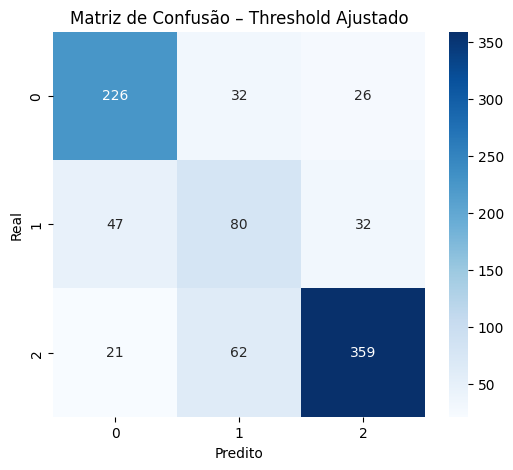

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred_thresh)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão – Threshold Ajustado")
plt.show()

#De 284 dropouts, ele previu 226
#Recall subiu para 0.80. Falsos negativos caíram drasticamente.Modelo agora detecta risco de evasão

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

cm = confusion_matrix(y_val, y_pred_thresh)

labels = ["Dropout", "Enrolled", "Graduate"]

rows = []
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        rows.append({
            "true_label": true_label,
            "predicted_label": pred_label,
            "count": cm[i, j]
        })

df_cm = pd.DataFrame(rows)
df_cm.to_csv("C:\\Users\\ADM\\Documents\\Estudos\\analise-preditiva\\notebooks\\andressa\\resultados\\confusion_matrix.csv", index=False)


In [ ]:
import numpy as np
import pandas as pd

mean_probs = y_proba.mean(axis=0)

df_probs = pd.DataFrame({
    "class": ["Dropout", "Enrolled", "Graduate"],
    "mean_probability": mean_probs
})

df_probs.to_csv("C:\\Users\\ADM\\Documents\\Estudos\\analise-preditiva\\notebooks\\andressa\\resultados\\prediction_probabilities_summary.csv", index=False)


Streamlit

In [27]:
import streamlit as st
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

st.title("📊 Resultados da Análise Preditiva")

# 1️⃣ Carregar dados com verdade (y_true) e previsão (y_pred)
file = st.file_uploader("Envie um CSV com y_true e y_pred")

if file:
    df = pd.read_csv(file)

    st.write("Prévia dos dados carregados")
    st.write(df.head())

    y_true = df["y_true"]
    y_pred = df["y_pred"]

    # 2️⃣ Classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    st.subheader("Relatório de Desempenho")
    st.write(pd.DataFrame(report).transpose())

    # 3️⃣ Mostrar F1 somente da classe Dropout
    if "Dropout" in report:
        dropout_f1 = report["Dropout"]["f1-score"]
        st.metric("🎯 F1 da Classe DROP OUT", f"{dropout_f1:.4f}")
    else:
        st.warning("Classe 'Dropout' não encontrada no dataset")

    # 4️⃣ Matriz de confusão
    st.subheader("Matriz de Confusão")
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    st.pyplot(fig)


2026-01-01 20:01:07.103 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-01 20:01:07.148 
  command:

    streamlit run c:\Users\ADM\Documents\Estudos\analise-preditiva\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-01-01 20:01:07.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-01 20:01:07.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-01 20:01:07.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-01 20:01:07.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-01 20:01:07.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-01 20:01: